In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime

1. **Baseline Model**:
Start with a very simple baseline model, such as a single convolutional layer, a max-pooling layer, and a dense layer. This model will likely underfit the data, but it will serve as a starting point.



170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
391/391 [==============================] - 8s 8ms/step - loss: 1.6160 - accuracy: 0.4257 - val_loss: 1.3983 - val_accuracy: 0.5030
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.2975 - accuracy: 0.5457 - val_loss: 1.2596 - val_accuracy: 0.5545
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1921 - accuracy: 0.5836 - val_loss: 1.2512 - val_accuracy: 0.5615
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.1242 - accuracy: 0.6076 - val_loss: 1.1792 - val_accuracy: 0.5860
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.0701 - accuracy: 0.6299 - val_loss: 1.1536 - val_accuracy: 0.5922
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.0242 - accuracy: 0.6445 - val_loss: 1.1242 - val_accuracy: 0.6077
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9813 

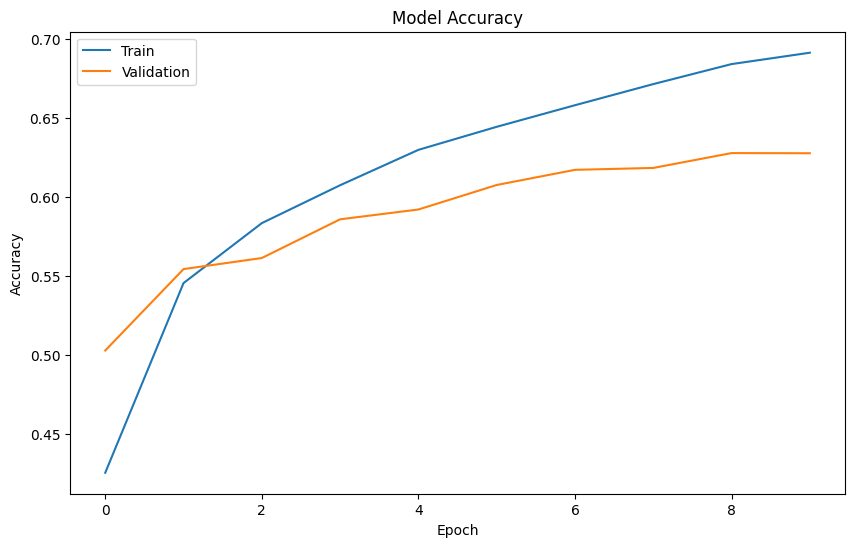

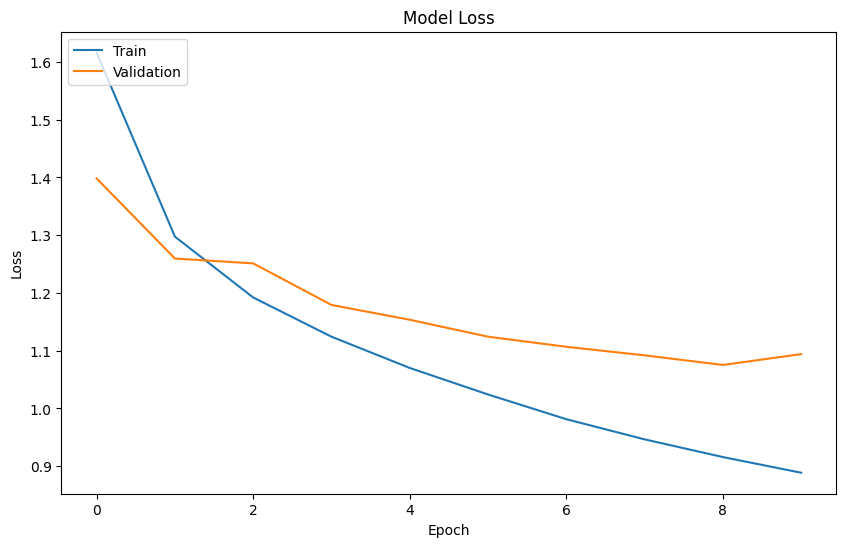

Model saved as baseline_model_20240523_201254_acc_0.6278.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# 1
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the baseline model
def build_baseline_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"baseline_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_baseline_model(input_shape)
    history = train_model(model, x_train, y_train, x_test, y_test, epochs=10)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

2. Increasing Model Depth:

Experiment: The number of convolutional layers was gradually increased to capture more complex features from the CIFAR-10 dataset.


Epoch 1/20
391/391 [==============================] - 8s 13ms/step - loss: 1.6013 - accuracy: 0.4165 - val_loss: 1.3397 - val_accuracy: 0.5126
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 1.1855 - accuracy: 0.5794 - val_loss: 1.0795 - val_accuracy: 0.6224
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 1.0094 - accuracy: 0.6463 - val_loss: 0.9875 - val_accuracy: 0.6522
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8902 - accuracy: 0.6884 - val_loss: 0.8970 - val_accuracy: 0.6912
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8021 - accuracy: 0.7204 - val_loss: 0.8372 - val_accuracy: 0.7107
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 0.7290 - accuracy: 0.7464 - val_loss: 0.8074 - val_accuracy: 0.7200
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.6710 - accuracy: 0.7664 - val_loss: 0.7895 - val_accuracy: 0.7302
Epo

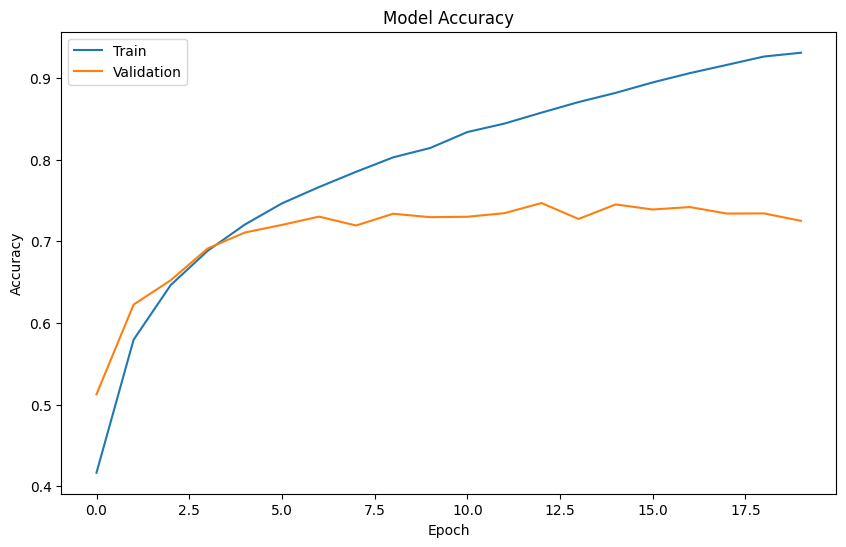

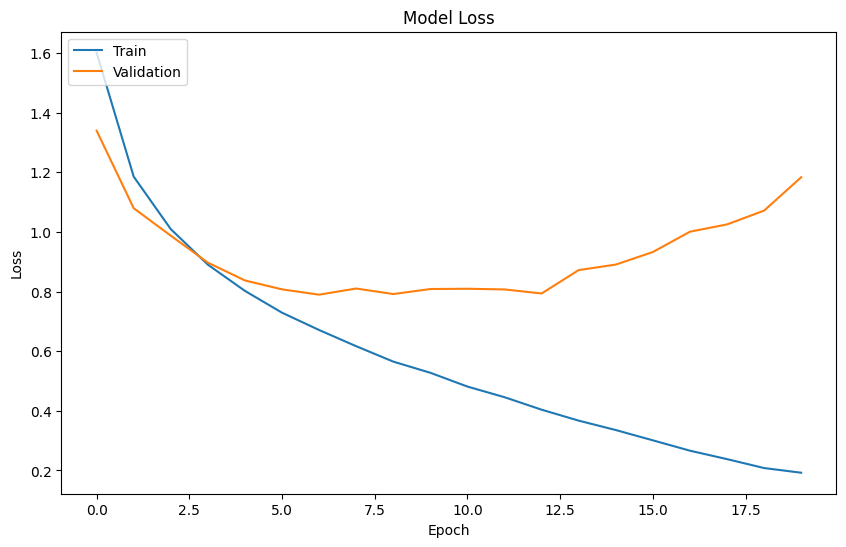

Model saved as deeper_model_20240523_201415_acc_0.7250.h5


In [3]:
# 2
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the deeper model
def build_deeper_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=20):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

# Plot training and validation metrics
def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"deeper_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_deeper_model(input_shape)
    history = train_model(model, x_train, y_train, x_test, y_test, epochs=20)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

3. Regularization Techniques:

Experiment: Dropout layers were added after each max pooling layer and before the final dense layer.


Epoch 1/30
391/391 [==============================] - 7s 12ms/step - loss: 1.7665 - accuracy: 0.3458 - val_loss: 1.3810 - val_accuracy: 0.4924
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 1.4114 - accuracy: 0.4909 - val_loss: 1.2276 - val_accuracy: 0.5624
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.2675 - accuracy: 0.5489 - val_loss: 1.1123 - val_accuracy: 0.6051
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1681 - accuracy: 0.5875 - val_loss: 0.9991 - val_accuracy: 0.6410
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 1.0922 - accuracy: 0.6146 - val_loss: 0.9532 - val_accuracy: 0.6714
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0176 - accuracy: 0.6445 - val_loss: 0.8852 - val_accuracy: 0.6838
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9685 - accuracy: 0.6632 - val_loss: 0.8517 - val_accuracy: 0.7025

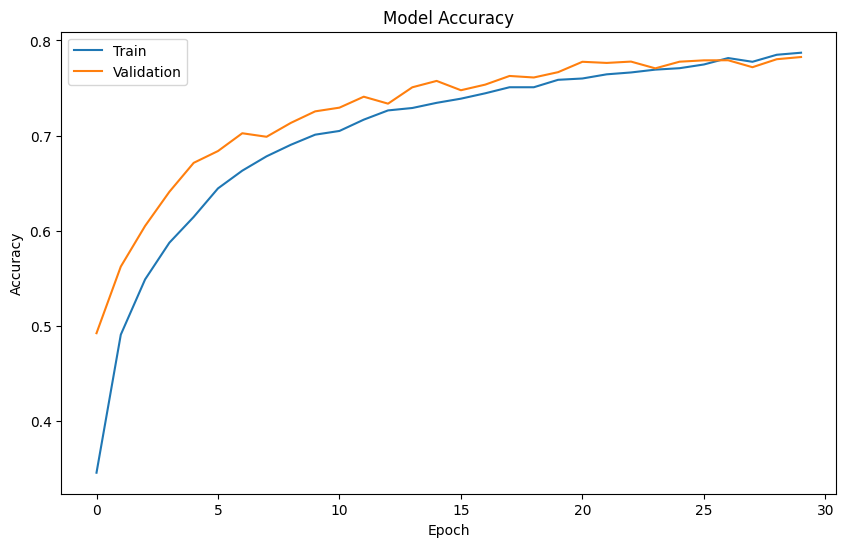

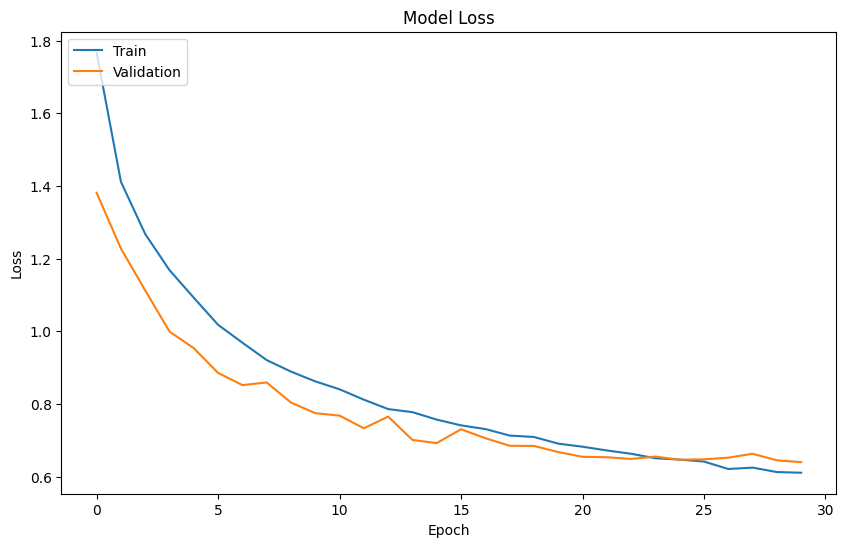

Model saved as dropout_model_20240523_201636_acc_0.7826.h5


In [4]:
#3

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the model with dropout regularization
def build_model_with_dropout(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=30):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"dropout_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_model_with_dropout(input_shape)
    history = train_model(model, x_train, y_train, x_test, y_test, epochs=30)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

4. Batch Normalization:

Experiment: Batch normalization layers were added after each convolutional layer.


Epoch 1/30
391/391 [==============================] - 9s 14ms/step - loss: 1.2701 - accuracy: 0.5535 - val_loss: 2.7889 - val_accuracy: 0.2203
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8542 - accuracy: 0.7006 - val_loss: 0.9212 - val_accuracy: 0.6750
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6820 - accuracy: 0.7606 - val_loss: 0.9188 - val_accuracy: 0.6854
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.5625 - accuracy: 0.8042 - val_loss: 0.7908 - val_accuracy: 0.7304
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.4686 - accuracy: 0.8365 - val_loss: 0.8219 - val_accuracy: 0.7252
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.3780 - accuracy: 0.8695 - val_loss: 0.8133 - val_accuracy: 0.7438
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.3051 - accuracy: 0.8958 - val_loss: 0.8937 - val_accuracy: 0.7351

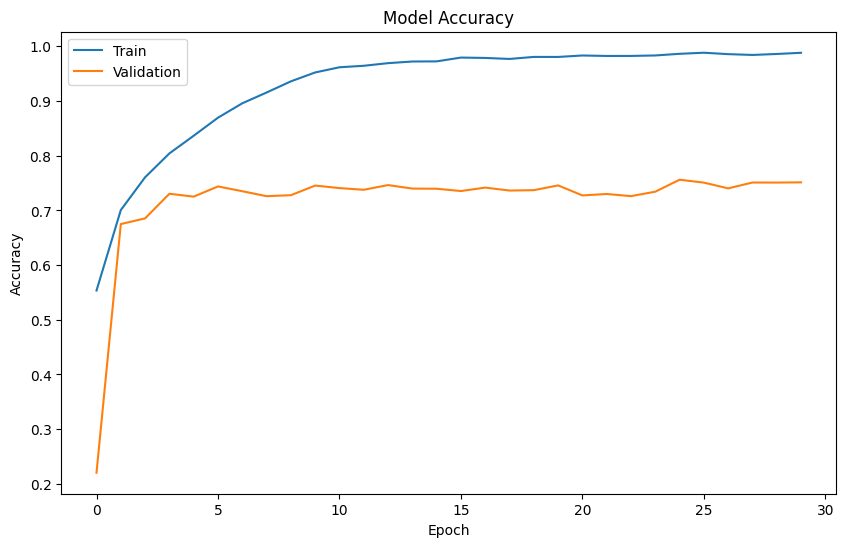

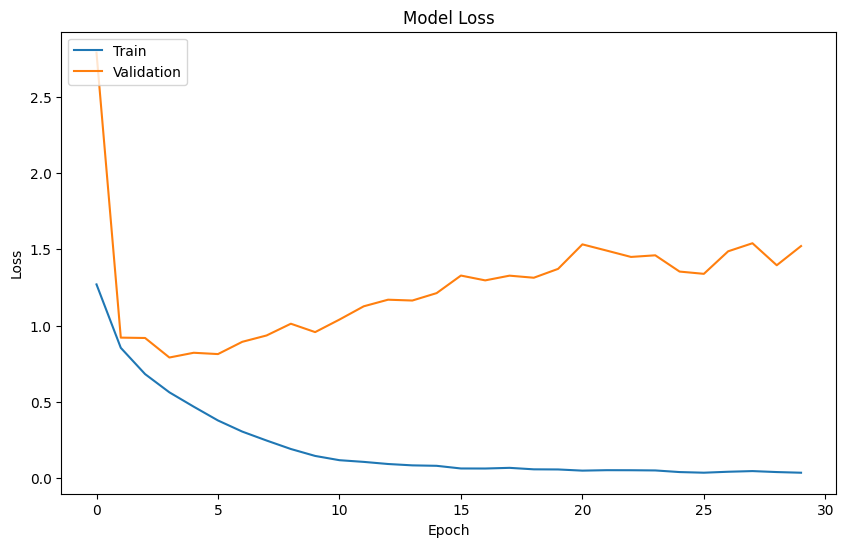

Model saved as batchnorm_model_20240523_201906_acc_0.7513.h5


In [5]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Build the model with batch normalization
def build_model_with_batch_norm(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=30):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"batchnorm_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    input_shape = get_input_shape(x_train)
    model = build_model_with_batch_norm(input_shape)
    history = train_model(model, x_train, y_train, x_test, y_test, epochs=30)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

5. Data Augmentation:

Experiment: Image data augmentation techniques were applied to expand the training dataset and improve the model's ability to generalize.

Epoch 1/30
391/391 [==============================] - 32s 74ms/step - loss: 1.4152 - accuracy: 0.4985 - val_loss: 2.3797 - val_accuracy: 0.2633
Epoch 2/30
391/391 [==============================] - 28s 73ms/step - loss: 1.0408 - accuracy: 0.6319 - val_loss: 1.2893 - val_accuracy: 0.5833
Epoch 3/30
391/391 [==============================] - 29s 74ms/step - loss: 0.9010 - accuracy: 0.6817 - val_loss: 0.8666 - val_accuracy: 0.7049
Epoch 4/30
391/391 [==============================] - 28s 72ms/step - loss: 0.8214 - accuracy: 0.7143 - val_loss: 0.9448 - val_accuracy: 0.6881
Epoch 5/30
391/391 [==============================] - 28s 73ms/step - loss: 0.7555 - accuracy: 0.7339 - val_loss: 0.7857 - val_accuracy: 0.7364
Epoch 6/30
391/391 [==============================] - 29s 75ms/step - loss: 0.7199 - accuracy: 0.7490 - val_loss: 0.7738 - val_accuracy: 0.7416
Epoch 7/30
391/391 [==============================] - 29s 74ms/step - loss: 0.6779 - accuracy: 0.7609 - val_loss: 0.7287 - val_accuracy:

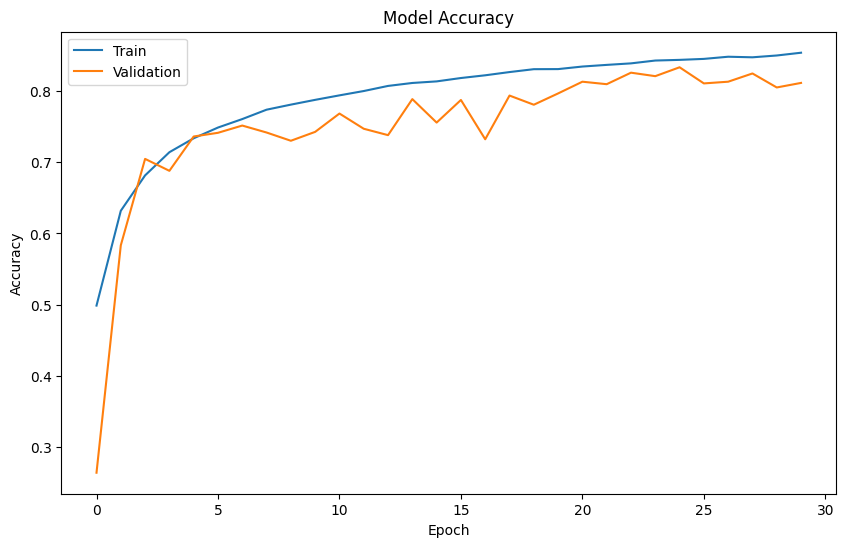

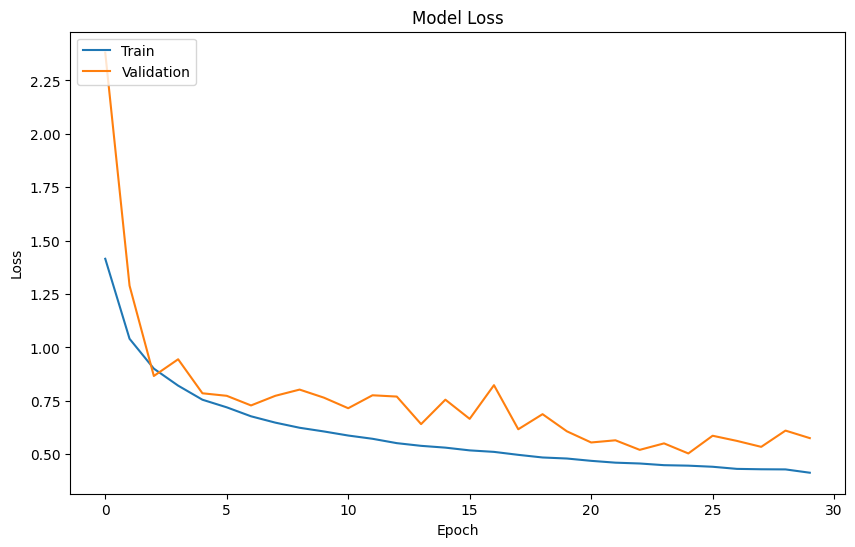

Model saved as augmented_model_20240523_203527_acc_0.8118.h5


In [6]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"augmented_model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)
    history = train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()

6. Learning Rate and Optimizer:

Experiment: Different learning rates and optimizers were likely tested to find the best combination for fast convergence and good performance.


Training with adam optimizer and learning rate: 0.001
Epoch 1/30
391/391 [==============================] - 31s 72ms/step - loss: 1.4035 - accuracy: 0.5028 - val_loss: 2.2730 - val_accuracy: 0.3094
Epoch 2/30
391/391 [==============================] - 28s 71ms/step - loss: 1.0297 - accuracy: 0.6346 - val_loss: 1.1557 - val_accuracy: 0.6029
Epoch 3/30
391/391 [==============================] - 28s 71ms/step - loss: 0.8983 - accuracy: 0.6853 - val_loss: 1.0867 - val_accuracy: 0.6546
Epoch 4/30
391/391 [==============================] - 29s 74ms/step - loss: 0.8193 - accuracy: 0.7107 - val_loss: 0.9599 - val_accuracy: 0.6787
Epoch 5/30
391/391 [==============================] - 28s 72ms/step - loss: 0.7621 - accuracy: 0.7303 - val_loss: 0.8197 - val_accuracy: 0.7182
Epoch 6/30
391/391 [==============================] - 28s 70ms/step - loss: 0.7216 - accuracy: 0.7472 - val_loss: 0.7199 - val_accuracy: 0.7521
Epoch 7/30
391/391 [==============================] - 28s 71ms/step - loss: 0.6845

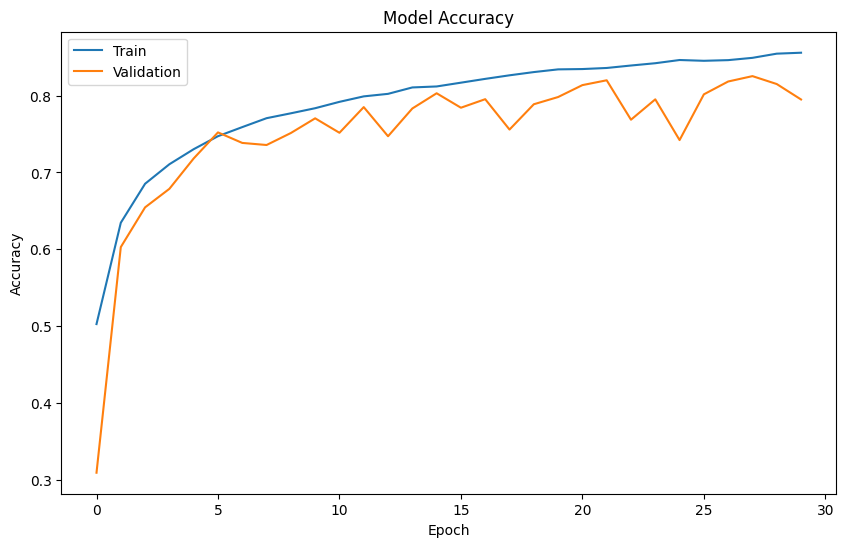

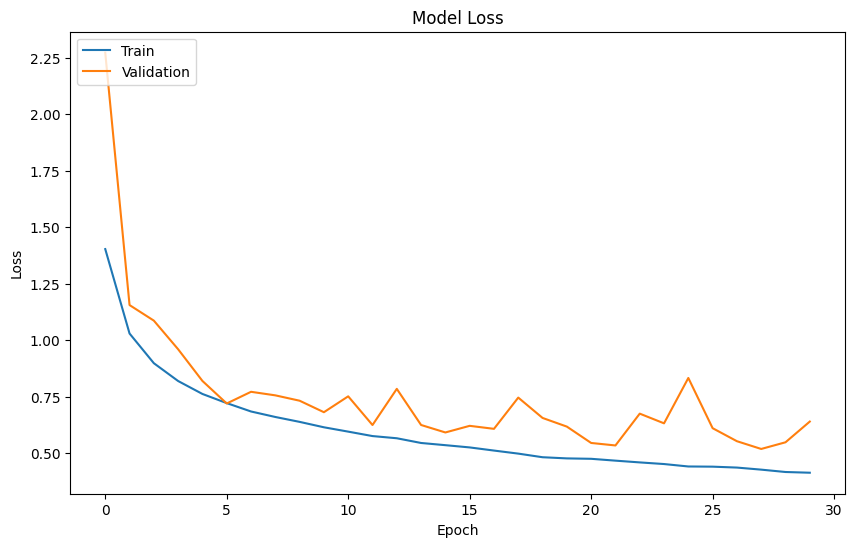

Model saved as model_20240523_205047_lr_0.001_opt_adam_acc_0.7949.h5
Training with adam optimizer and learning rate: 0.01
Epoch 1/30
391/391 [==============================] - 32s 74ms/step - loss: 0.8401 - accuracy: 0.7105 - val_loss: 1.4850 - val_accuracy: 0.5900
Epoch 2/30
391/391 [==============================] - 28s 73ms/step - loss: 0.7122 - accuracy: 0.7501 - val_loss: 1.0786 - val_accuracy: 0.6617
Epoch 3/30
391/391 [==============================] - 28s 73ms/step - loss: 0.6598 - accuracy: 0.7700 - val_loss: 1.1293 - val_accuracy: 0.6604
Epoch 4/30
391/391 [==============================] - 28s 72ms/step - loss: 0.6258 - accuracy: 0.7829 - val_loss: 0.7720 - val_accuracy: 0.7492
Epoch 5/30
391/391 [==============================] - 28s 71ms/step - loss: 0.5932 - accuracy: 0.7934 - val_loss: 1.0437 - val_accuracy: 0.6759
Epoch 6/30
391/391 [==============================] - 28s 72ms/step - loss: 0.5702 - accuracy: 0.8031 - val_loss: 0.8609 - val_accuracy: 0.7271
Epoch 7/30
391

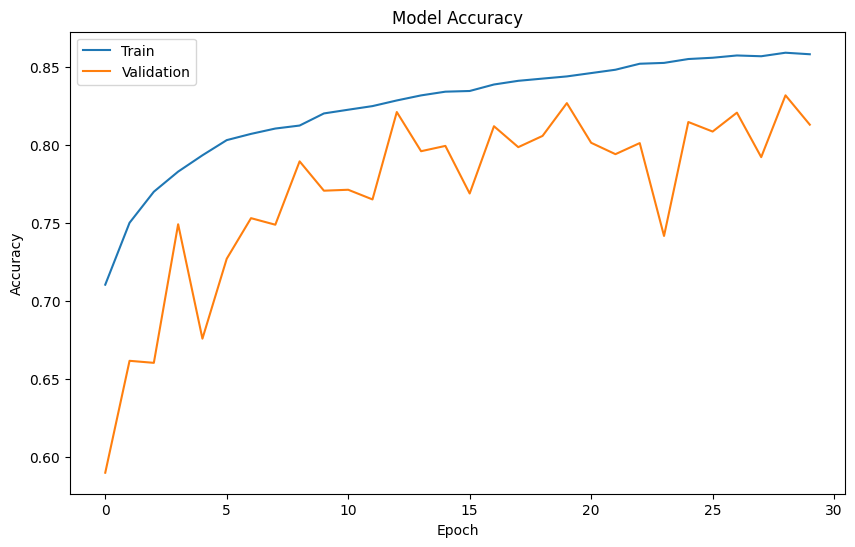

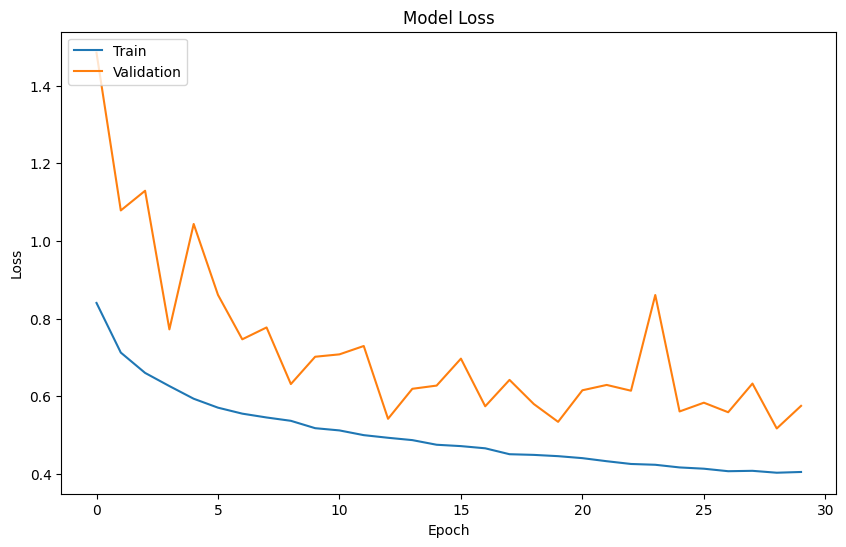

Model saved as model_20240523_210657_lr_0.01_opt_adam_acc_0.8130.h5
Training with adam optimizer and learning rate: 0.1
Epoch 1/30
391/391 [==============================] - 33s 76ms/step - loss: 1.0888 - accuracy: 0.6323 - val_loss: 1.9141 - val_accuracy: 0.5287
Epoch 2/30
391/391 [==============================] - 29s 74ms/step - loss: 0.9101 - accuracy: 0.6931 - val_loss: 1.4055 - val_accuracy: 0.6150
Epoch 3/30
391/391 [==============================] - 28s 72ms/step - loss: 1.1069 - accuracy: 0.6208 - val_loss: 1.0915 - val_accuracy: 0.6711
Epoch 4/30
391/391 [==============================] - 29s 74ms/step - loss: 1.4219 - accuracy: 0.4933 - val_loss: 1.7935 - val_accuracy: 0.4418
Epoch 5/30
391/391 [==============================] - 29s 75ms/step - loss: 1.1639 - accuracy: 0.5906 - val_loss: 1.0019 - val_accuracy: 0.6642
Epoch 6/30
391/391 [==============================] - 29s 73ms/step - loss: 1.0611 - accuracy: 0.6298 - val_loss: 1.2351 - val_accuracy: 0.6069
Epoch 7/30
391/3

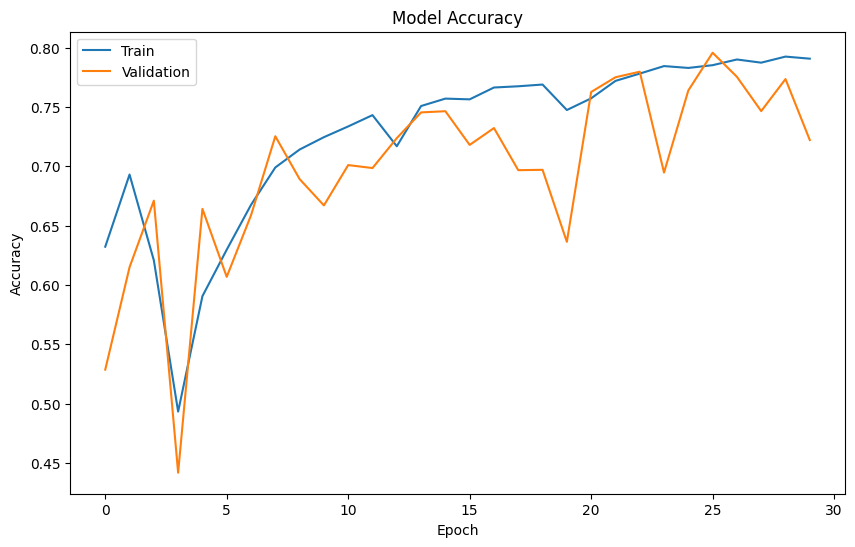

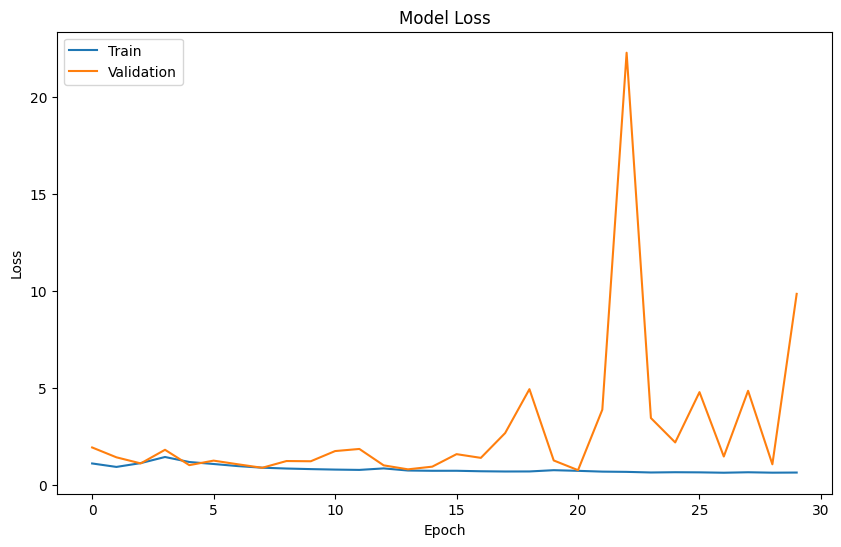

Model saved as model_20240523_212307_lr_0.1_opt_adam_acc_0.7222.h5
Training with sgd optimizer and learning rate: 0.001
Epoch 1/30
391/391 [==============================] - 32s 77ms/step - loss: 0.5806 - accuracy: 0.8025 - val_loss: 3.2921 - val_accuracy: 0.7957
Epoch 2/30
391/391 [==============================] - 29s 74ms/step - loss: 0.5633 - accuracy: 0.8087 - val_loss: 3.7556 - val_accuracy: 0.7989
Epoch 3/30
391/391 [==============================] - 29s 74ms/step - loss: 0.5626 - accuracy: 0.8078 - val_loss: 8.8205 - val_accuracy: 0.7979
Epoch 4/30
391/391 [==============================] - 29s 73ms/step - loss: 0.5574 - accuracy: 0.8103 - val_loss: 16.2890 - val_accuracy: 0.7996
Epoch 5/30
391/391 [==============================] - 29s 73ms/step - loss: 0.5513 - accuracy: 0.8110 - val_loss: 20.9961 - val_accuracy: 0.7991
Epoch 6/30
391/391 [==============================] - 29s 75ms/step - loss: 0.5554 - accuracy: 0.8107 - val_loss: 20.7748 - val_accuracy: 0.8004
Epoch 7/30
39

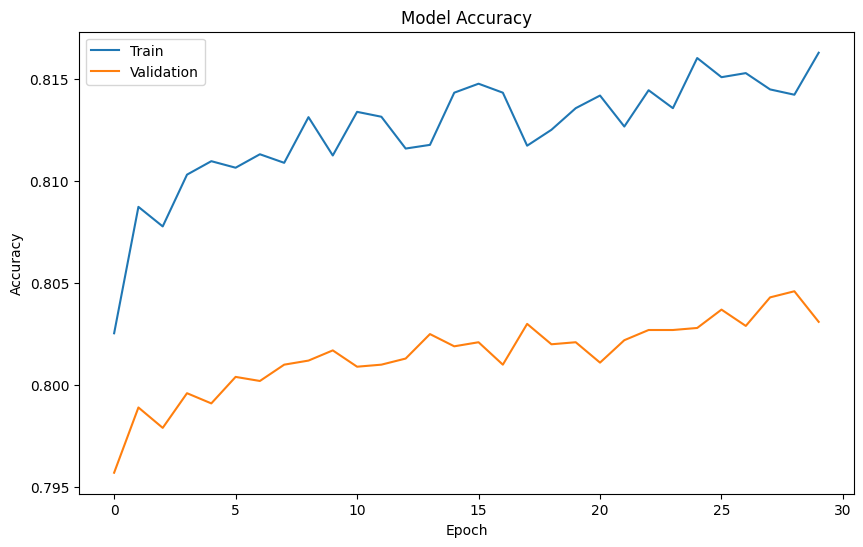

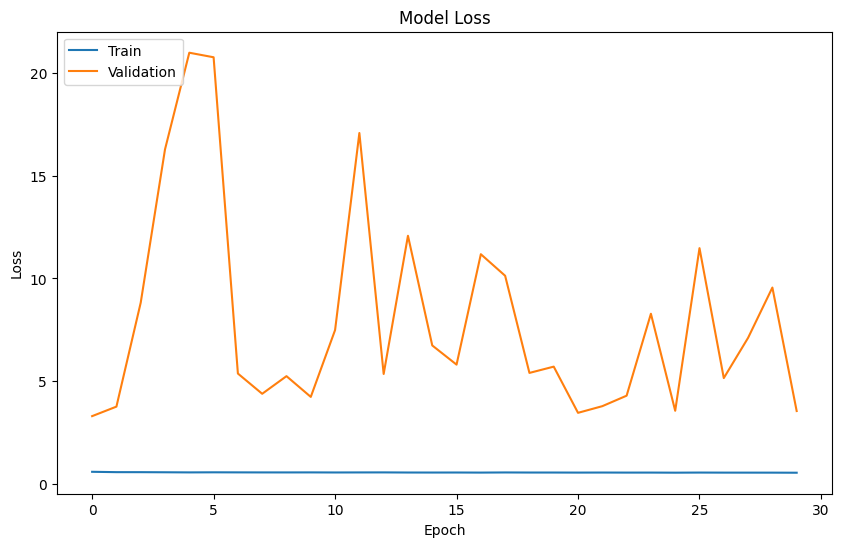

Model saved as model_20240523_213948_lr_0.001_opt_sgd_acc_0.8031.h5
Training with sgd optimizer and learning rate: 0.01
Epoch 1/30
391/391 [==============================] - 33s 80ms/step - loss: 0.5372 - accuracy: 0.8153 - val_loss: 4.8727 - val_accuracy: 0.8053
Epoch 2/30
391/391 [==============================] - 31s 79ms/step - loss: 0.5374 - accuracy: 0.8148 - val_loss: 1.6354 - val_accuracy: 0.8048
Epoch 3/30
391/391 [==============================] - 32s 81ms/step - loss: 0.5346 - accuracy: 0.8149 - val_loss: 3.3973 - val_accuracy: 0.8033
Epoch 4/30
391/391 [==============================] - 31s 78ms/step - loss: 0.5323 - accuracy: 0.8169 - val_loss: 7.2617 - val_accuracy: 0.8044
Epoch 5/30
391/391 [==============================] - 31s 79ms/step - loss: 0.5288 - accuracy: 0.8192 - val_loss: 4.4234 - val_accuracy: 0.8048
Epoch 6/30
391/391 [==============================] - 31s 79ms/step - loss: 0.5324 - accuracy: 0.8186 - val_loss: 2.4863 - val_accuracy: 0.8038
Epoch 7/30
391/3

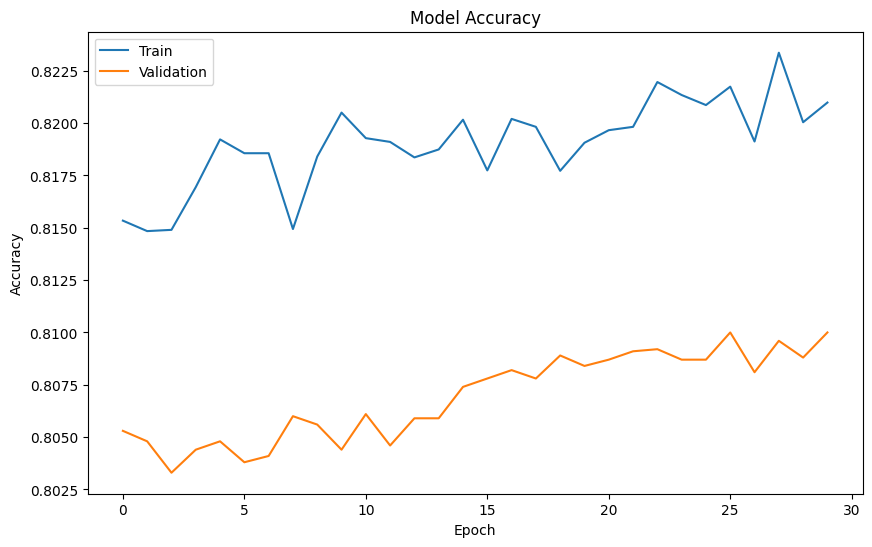

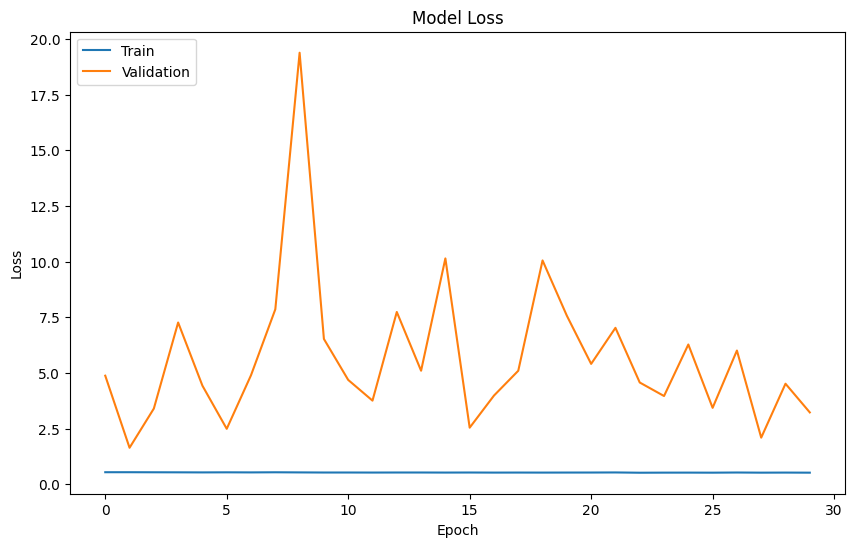

Model saved as model_20240523_215613_lr_0.01_opt_sgd_acc_0.8100.h5
Training with sgd optimizer and learning rate: 0.1
Epoch 1/30
391/391 [==============================] - 34s 83ms/step - loss: 0.5180 - accuracy: 0.8205 - val_loss: 8.1018 - val_accuracy: 0.8080
Epoch 2/30
391/391 [==============================] - 33s 85ms/step - loss: 0.5169 - accuracy: 0.8209 - val_loss: 9.3008 - val_accuracy: 0.8092
Epoch 3/30
391/391 [==============================] - 31s 80ms/step - loss: 0.5146 - accuracy: 0.8219 - val_loss: 16.4439 - val_accuracy: 0.8114
Epoch 4/30
391/391 [==============================] - 31s 79ms/step - loss: 0.5164 - accuracy: 0.8202 - val_loss: 4.5698 - val_accuracy: 0.8118
Epoch 5/30
391/391 [==============================] - 32s 82ms/step - loss: 0.5114 - accuracy: 0.8239 - val_loss: 3.3814 - val_accuracy: 0.8069
Epoch 6/30
391/391 [==============================] - 30s 78ms/step - loss: 0.5109 - accuracy: 0.8228 - val_loss: 8.2930 - val_accuracy: 0.8121
Epoch 7/30
391/39

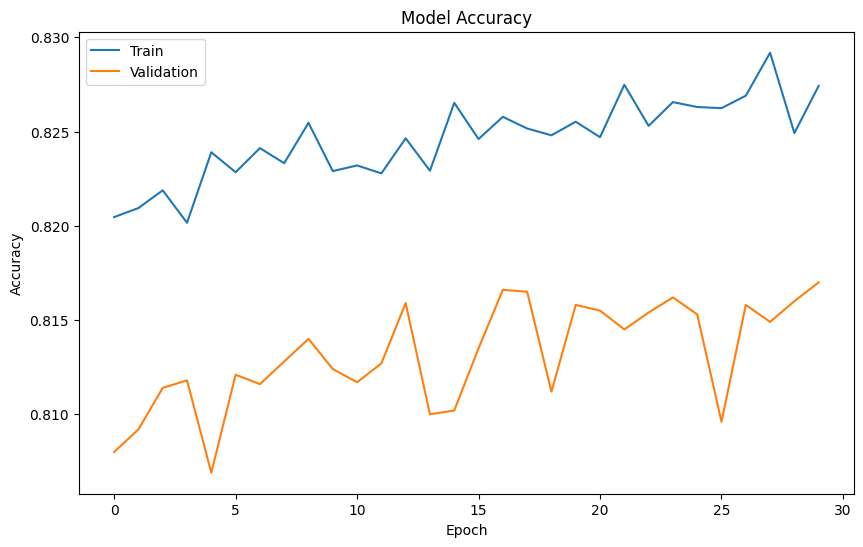

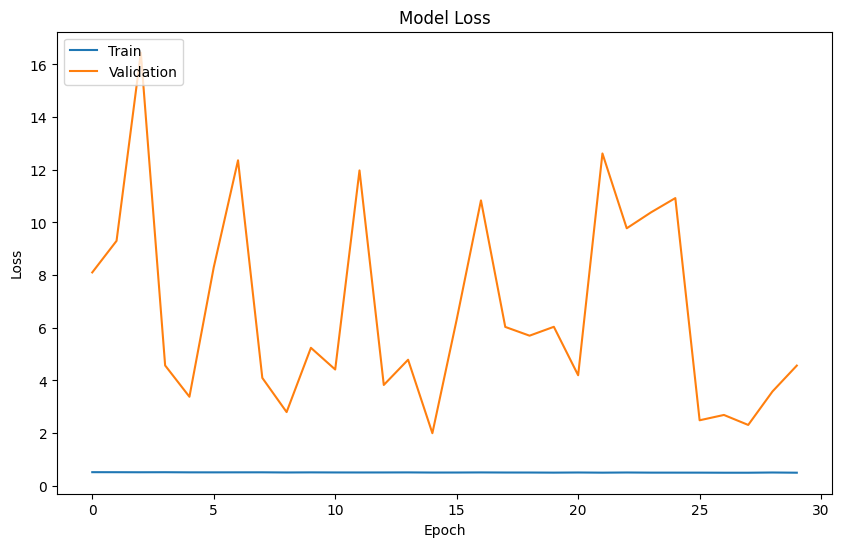

Model saved as model_20240523_221411_lr_0.1_opt_sgd_acc_0.8170.h5


In [7]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model with specified learning rate and optimizer
def compile_model(model, learning_rate, optimizer):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
def train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_test, y_test))
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc, learning_rate, optimizer):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"model_{timestamp}_lr_{learning_rate}_opt_{optimizer}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)

    learning_rates = [0.001, 0.01, 0.1]
    optimizers = ['adam', 'sgd']

    for optimizer in optimizers:
        for learning_rate in learning_rates:
            print(f"Training with {optimizer} optimizer and learning rate: {learning_rate}")
            compile_model(model, learning_rate, optimizer)
            history = train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=30)
            test_acc = evaluate_model(model, x_test, y_test)
            plot_metrics(history)
            save_model(model, test_acc, learning_rate, optimizer)

if __name__ == "__main__":
    main()

7. Early Stopping:

Experiment: Early stopping was implemented to prevent overfitting and find the optimal number of training epochs.

Epoch 1/100
391/391 [==============================] - 33s 77ms/step - loss: 1.3994 - accuracy: 0.5030 - val_loss: 1.9257 - val_accuracy: 0.3422
Epoch 2/100
391/391 [==============================] - 29s 73ms/step - loss: 1.0395 - accuracy: 0.6320 - val_loss: 1.2867 - val_accuracy: 0.5716
Epoch 3/100
391/391 [==============================] - 28s 73ms/step - loss: 0.8930 - accuracy: 0.6859 - val_loss: 0.9160 - val_accuracy: 0.6882
Epoch 4/100
391/391 [==============================] - 28s 72ms/step - loss: 0.8014 - accuracy: 0.7208 - val_loss: 0.8992 - val_accuracy: 0.7104
Epoch 5/100
391/391 [==============================] - 29s 75ms/step - loss: 0.7505 - accuracy: 0.7381 - val_loss: 1.0392 - val_accuracy: 0.6546
Epoch 6/100
391/391 [==============================] - 28s 72ms/step - loss: 0.7068 - accuracy: 0.7520 - val_loss: 0.8442 - val_accuracy: 0.7132
Epoch 7/100
391/391 [==============================] - 28s 72ms/step - loss: 0.6757 - accuracy: 0.7634 - val_loss: 0.9005 - val_ac

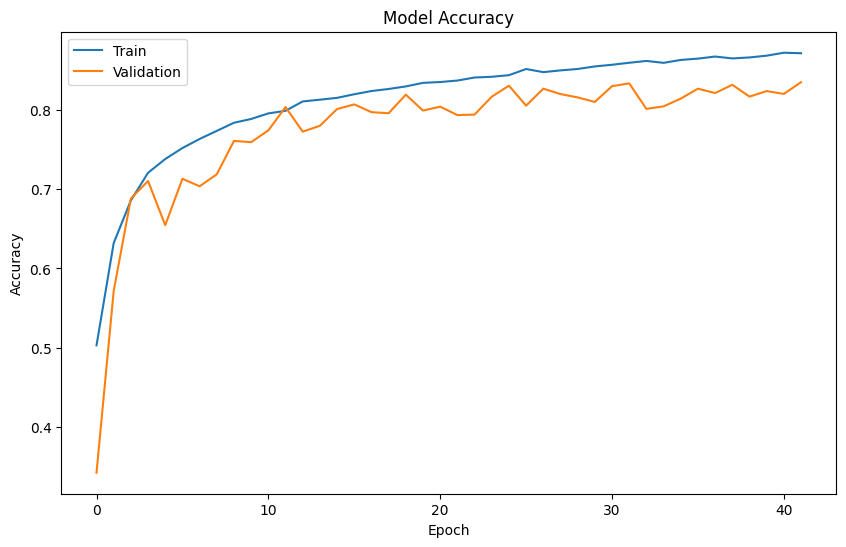

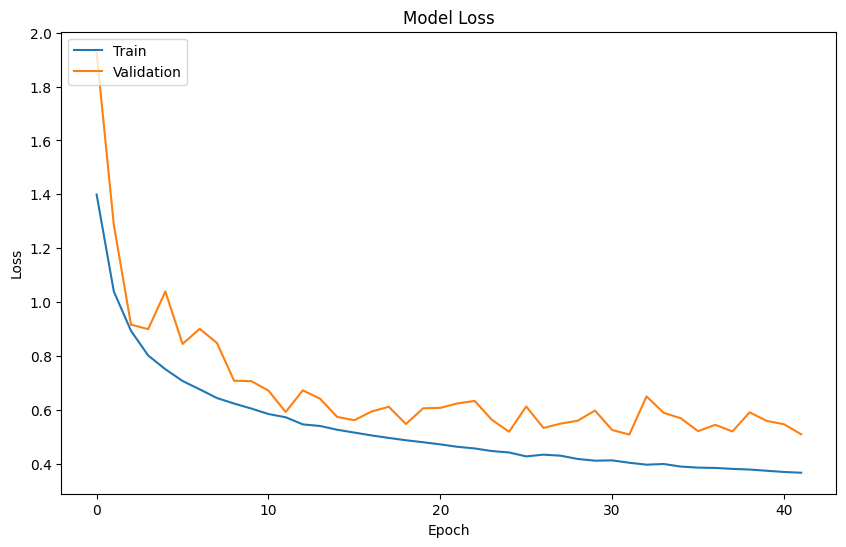

Model saved as model_20240523_223801_acc_0.8336.h5


In [8]:


# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU not available, using CPU.")

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Define the input shape
def get_input_shape(x_train):
    input_shape = x_train.shape[1:]
    return input_shape

# Apply data augmentation
def augment_data(x_train):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)
    return datagen

# Build the model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
def compile_model(model, learning_rate, optimizer):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
def train_model(model, x_train, y_train, x_test, y_test, datagen, epochs=100, patience=10):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                        epochs=epochs, validation_data=(x_test, y_test),
                        callbacks=[early_stopping])
    return history

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    return test_acc

def plot_metrics(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Save the model with a timestamp and accuracy in the filename
def save_model(model, test_acc):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"model_{timestamp}_acc_{test_acc:.4f}.h5"
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

# Main function
def main():
    x_train, y_train, x_test, y_test = load_data()
    datagen = augment_data(x_train)
    input_shape = get_input_shape(x_train)
    model = build_model(input_shape)

    learning_rate = 0.001
    optimizer = 'adam'
    epochs = 100
    patience = 10

    compile_model(model, learning_rate, optimizer)
    history = train_model(model, x_train, y_train, x_test, y_test, datagen, epochs, patience)
    test_acc = evaluate_model(model, x_test, y_test)
    plot_metrics(history)
    save_model(model, test_acc)

if __name__ == "__main__":
    main()